# Business Understanding

# Data Understanding

# Data Preparation

In [134]:
import pandas as pd

In [135]:
patients = pd.read_csv('data/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv')

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (1,2,7,11,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [136]:
patients.head()

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,0,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,18 to 29,NaN,F,White,...,Self-Pay,NaN,3623.0,NaN,NaN,0,N,Y,4476.23,1672.65
1,1,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,NaN,M,White,...,Medicare,Blue Cross,216951.0,216951.0,NaN,0,N,Y,148612.34,51414.70
2,2,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,M,White,...,Blue Cross,Self-Pay,3076.0,NaN,NaN,0,N,N,16561.99,4032.49
3,3,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,140796.0,140796.0,170254.0,0,N,N,13593.51,4947.81
4,4,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,170254.0,170254.0,170254.0,0,N,N,31962.58,16988.33


In [137]:
patients = patients[(patients['Hospital County']=='Kings')]

In [138]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298247 entries, 1540091 to 2478653
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   index                                298247 non-null  int64  
 1   Health Service Area                  298247 non-null  object 
 2   Hospital County                      298247 non-null  object 
 3   Operating Certificate Number         298247 non-null  float64
 4   Facility ID                          298247 non-null  float64
 5   Facility Name                        298247 non-null  object 
 6   Age Group                            298247 non-null  object 
 7   Zip Code - 3 digits                  298200 non-null  object 
 8   Gender                               298247 non-null  object 
 9   Race                                 298247 non-null  object 
 10  Ethnicity                            298247 non-null  object 
 11  Length

In [139]:
patients.isna().sum()

index                                       0
Health Service Area                         0
Hospital County                             0
Operating Certificate Number                0
Facility ID                                 0
Facility Name                               0
Age Group                                   0
Zip Code - 3 digits                        47
Gender                                      0
Race                                        0
Ethnicity                                   0
Length of Stay                              0
Type of Admission                           0
Patient Disposition                         6
Discharge Year                              0
CCS Diagnosis Code                         62
CCS Diagnosis Description                  62
CCS Procedure Code                         62
CCS Procedure Description                  62
APR DRG Code                                0
APR DRG Description                         0
APR MDC Code                      

In [140]:
patients.drop(columns=['index', 'Source of Payment 2', 'Source of Payment 3', 'Operating Provider License Number', 
                      'Other Provider License Number', 'Operating Certificate Number', 'Facility ID', 
                      'CCS Diagnosis Code', 'CCS Procedure Code', 'APR DRG Code', 'APR MDC Code', 
                       'APR Severity of Illness Code', 'Attending Provider License Number','Discharge Year',
                      'Birth Weight','Abortion Edit Indicator', 'Hospital County'], inplace=True)

In [141]:
patients.isna().sum()

Health Service Area                      0
Facility Name                            0
Age Group                                0
Zip Code - 3 digits                     47
Gender                                   0
Race                                     0
Ethnicity                                0
Length of Stay                           0
Type of Admission                        0
Patient Disposition                      6
CCS Diagnosis Description               62
CCS Procedure Description               62
APR DRG Description                      0
APR MDC Description                      0
APR Severity of Illness Description    134
APR Risk of Mortality                  134
APR Medical Surgical Description         0
Source of Payment 1                      0
Emergency Department Indicator           0
Total Charges                            0
Total Costs                              0
dtype: int64

In [142]:
patients = patients.dropna(how='any',axis=0)

In [143]:
patients.isna().sum()

Health Service Area                    0
Facility Name                          0
Age Group                              0
Zip Code - 3 digits                    0
Gender                                 0
Race                                   0
Ethnicity                              0
Length of Stay                         0
Type of Admission                      0
Patient Disposition                    0
CCS Diagnosis Description              0
CCS Procedure Description              0
APR DRG Description                    0
APR MDC Description                    0
APR Severity of Illness Description    0
APR Risk of Mortality                  0
APR Medical Surgical Description       0
Source of Payment 1                    0
Emergency Department Indicator         0
Total Charges                          0
Total Costs                            0
dtype: int64

In [144]:
names = []
for name in patients.columns:    
    name = name.replace(' ', '_')
    name = name.lower()
    names.append(name)
patients.columns = names

In [145]:
patients.columns

Index(['health_service_area', 'facility_name', 'age_group',
       'zip_code_-_3_digits', 'gender', 'race', 'ethnicity', 'length_of_stay',
       'type_of_admission', 'patient_disposition', 'ccs_diagnosis_description',
       'ccs_procedure_description', 'apr_drg_description',
       'apr_mdc_description', 'apr_severity_of_illness_description',
       'apr_risk_of_mortality', 'apr_medical_surgical_description',
       'source_of_payment_1', 'emergency_department_indicator',
       'total_charges', 'total_costs'],
      dtype='object')

In [146]:
patients.head()

,health_service_area,facility_name,age_group,zip_code_-_3_digits,gender,race,ethnicity,length_of_stay,type_of_admission,patient_disposition,...,ccs_procedure_description,apr_drg_description,apr_mdc_description,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,source_of_payment_1,emergency_department_indicator,total_charges,total_costs
1540091,New York City,Brookdale Hospital Medical Center,0 to 17,100,M,White,Spanish/Hispanic,12,Newborn,Home or Self Care,...,NO PROC,"NEONATE BIRTHWT >2499G, NORMAL NEWBORN OR NEON...",Newborns and Other Neonates with Conditions Or...,Minor,Minor,Medical,Insurance Company,N,17611.10,9305.60
1540092,New York City,Brookdale Hospital Medical Center,0 to 17,100,M,Black/African American,Not Span/Hispanic,2,Emergency,Home or Self Care,...,"TRTMNT,FACE FRACT/DISLC",DENTAL & ORAL DISEASES & INJURIES,"Ear, Nose, Mouth, Throat and Craniofacial Dise...",Minor,Minor,Medical,CHAMPUS,Y,12429.82,8025.98
1540093,New York City,Brookdale Hospital Medical Center,0 to 17,100,M,Black/African American,Not Span/Hispanic,11,Newborn,Home or Self Care,...,OTHER THERAPEUTIC PRCS,NEONATE BIRTHWT >2499G W CONGENITAL/PERINATAL ...,Newborns and Other Neonates with Conditions Or...,Moderate,Minor,Medical,Insurance Company,N,20759.16,11015.50
1540094,New York City,Brookdale Hospital Medical Center,0 to 17,100,F,Black/African American,Spanish/Hispanic,34,Newborn,Home w/ Home Health Services,...,OTHER THERAPEUTIC PRCS,NEONATE BIRTHWT 1500-1999G W CONGENITAL/PERINA...,Newborns and Other Neonates with Conditions Or...,Moderate,Moderate,Medical,Medicaid,N,62600.46,33468.42
1540095,New York City,Brookdale Hospital Medical Center,0 to 17,100,F,Black/African American,Not Span/Hispanic,13,Emergency,Home or Self Care,...,PSYCHO/PSYCHI EVAL/THER,BIPOLAR DISORDERS,Mental Diseases and Disorders,Moderate,Minor,Medical,Medicaid,Y,24109.50,12666.76


In [147]:
patients['zip_code_-_3_digits'] = patients['zip_code_-_3_digits'].astype(str)
patients['zip_code_-_3_digits'] = patients['zip_code_-_3_digits'].apply(lambda x: x[:3])
patients['zip_code'] = patients['zip_code_-_3_digits']
patients.drop(columns=['zip_code_-_3_digits'],inplace=True)

In [148]:
patients.head()

,health_service_area,facility_name,age_group,gender,race,ethnicity,length_of_stay,type_of_admission,patient_disposition,ccs_diagnosis_description,...,apr_drg_description,apr_mdc_description,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,source_of_payment_1,emergency_department_indicator,total_charges,total_costs,zip_code
1540091,New York City,Brookdale Hospital Medical Center,0 to 17,M,White,Spanish/Hispanic,12,Newborn,Home or Self Care,LIVEBORN,...,"NEONATE BIRTHWT >2499G, NORMAL NEWBORN OR NEON...",Newborns and Other Neonates with Conditions Or...,Minor,Minor,Medical,Insurance Company,N,17611.10,9305.60,100
1540092,New York City,Brookdale Hospital Medical Center,0 to 17,M,Black/African American,Not Span/Hispanic,2,Emergency,Home or Self Care,SKULL/FACE FRACTURE,...,DENTAL & ORAL DISEASES & INJURIES,"Ear, Nose, Mouth, Throat and Craniofacial Dise...",Minor,Minor,Medical,CHAMPUS,Y,12429.82,8025.98,100
1540093,New York City,Brookdale Hospital Medical Center,0 to 17,M,Black/African American,Not Span/Hispanic,11,Newborn,Home or Self Care,LIVEBORN,...,NEONATE BIRTHWT >2499G W CONGENITAL/PERINATAL ...,Newborns and Other Neonates with Conditions Or...,Moderate,Minor,Medical,Insurance Company,N,20759.16,11015.50,100
1540094,New York City,Brookdale Hospital Medical Center,0 to 17,F,Black/African American,Spanish/Hispanic,34,Newborn,Home w/ Home Health Services,LIVEBORN,...,NEONATE BIRTHWT 1500-1999G W CONGENITAL/PERINA...,Newborns and Other Neonates with Conditions Or...,Moderate,Moderate,Medical,Medicaid,N,62600.46,33468.42,100
1540095,New York City,Brookdale Hospital Medical Center,0 to 17,F,Black/African American,Not Span/Hispanic,13,Emergency,Home or Self Care,MOOD DISORDERS,...,BIPOLAR DISORDERS,Mental Diseases and Disorders,Moderate,Minor,Medical,Medicaid,Y,24109.50,12666.76,100


In [149]:
patients['gender'] = patients['gender'].apply(lambda x: 'F' if x == 'U' else x)

In [150]:
patients['race'] = patients['race'].apply(lambda x: 'White' if x == 'Unknown' else x)

In [151]:
patients['type_of_admission'] = patients['type_of_admission'].apply(lambda x: 'Emergency' if x == 'Not Available' 
                                                                    else x)

In [152]:
patients.head()

,health_service_area,facility_name,age_group,gender,race,ethnicity,length_of_stay,type_of_admission,patient_disposition,ccs_diagnosis_description,...,apr_drg_description,apr_mdc_description,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,source_of_payment_1,emergency_department_indicator,total_charges,total_costs,zip_code
1540091,New York City,Brookdale Hospital Medical Center,0 to 17,M,White,Spanish/Hispanic,12,Newborn,Home or Self Care,LIVEBORN,...,"NEONATE BIRTHWT >2499G, NORMAL NEWBORN OR NEON...",Newborns and Other Neonates with Conditions Or...,Minor,Minor,Medical,Insurance Company,N,17611.10,9305.60,100
1540092,New York City,Brookdale Hospital Medical Center,0 to 17,M,Black/African American,Not Span/Hispanic,2,Emergency,Home or Self Care,SKULL/FACE FRACTURE,...,DENTAL & ORAL DISEASES & INJURIES,"Ear, Nose, Mouth, Throat and Craniofacial Dise...",Minor,Minor,Medical,CHAMPUS,Y,12429.82,8025.98,100
1540093,New York City,Brookdale Hospital Medical Center,0 to 17,M,Black/African American,Not Span/Hispanic,11,Newborn,Home or Self Care,LIVEBORN,...,NEONATE BIRTHWT >2499G W CONGENITAL/PERINATAL ...,Newborns and Other Neonates with Conditions Or...,Moderate,Minor,Medical,Insurance Company,N,20759.16,11015.50,100
1540094,New York City,Brookdale Hospital Medical Center,0 to 17,F,Black/African American,Spanish/Hispanic,34,Newborn,Home w/ Home Health Services,LIVEBORN,...,NEONATE BIRTHWT 1500-1999G W CONGENITAL/PERINA...,Newborns and Other Neonates with Conditions Or...,Moderate,Moderate,Medical,Medicaid,N,62600.46,33468.42,100
1540095,New York City,Brookdale Hospital Medical Center,0 to 17,F,Black/African American,Not Span/Hispanic,13,Emergency,Home or Self Care,MOOD DISORDERS,...,BIPOLAR DISORDERS,Mental Diseases and Disorders,Moderate,Minor,Medical,Medicaid,Y,24109.50,12666.76,100


In [153]:
patients['source_of_payment_1'] = patients['source_of_payment_1'].apply(lambda x: 'Medicare' if x == 'Unknown' 
                                                              else x)

In [154]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297998 entries, 1540091 to 2478653
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   health_service_area                  297998 non-null  object 
 1   facility_name                        297998 non-null  object 
 2   age_group                            297998 non-null  object 
 3   gender                               297998 non-null  object 
 4   race                                 297998 non-null  object 
 5   ethnicity                            297998 non-null  object 
 6   length_of_stay                       297998 non-null  object 
 7   type_of_admission                    297998 non-null  object 
 8   patient_disposition                  297998 non-null  object 
 9   ccs_diagnosis_description            297998 non-null  object 
 10  ccs_procedure_description            297998 non-null  object 
 11  apr_dr

In [155]:
patients['length_of_stay'] = patients['length_of_stay'].apply(lambda x: '120' if x == '120 +' else x)

In [156]:
patients['length_of_stay'] = patients['length_of_stay'].astype(int)

In [157]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297998 entries, 1540091 to 2478653
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   health_service_area                  297998 non-null  object 
 1   facility_name                        297998 non-null  object 
 2   age_group                            297998 non-null  object 
 3   gender                               297998 non-null  object 
 4   race                                 297998 non-null  object 
 5   ethnicity                            297998 non-null  object 
 6   length_of_stay                       297998 non-null  int64  
 7   type_of_admission                    297998 non-null  object 
 8   patient_disposition                  297998 non-null  object 
 9   ccs_diagnosis_description            297998 non-null  object 
 10  ccs_procedure_description            297998 non-null  object 
 11  apr_dr

In [158]:
patients['patient_disposition'] = patients['patient_disposition'].apply(lambda x: 'Home or Self Care' if 
                                                                        (x == 'Expired' or 
                                                                        x == 'Another Type Not Listed') else x)

# Exploratory Data Analysis

In [25]:
patients.reset_index(inplace=True,drop=True)

In [26]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [27]:
categorical_columns = patients.select_dtypes(include=['object']).columns.tolist()

In [28]:
encoder = OneHotEncoder(sparse=False,drop='first')
one_hot_encoded = encoder.fit_transform(patients[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names(categorical_columns))

In [29]:
one_hot_df

,facility_name_Brookdale Hospital Medical Center,facility_name_Brooklyn Hospital Center - Downtown Campus,facility_name_Coney Island Hospital,facility_name_Interfaith Medical Center,facility_name_Kings County Hospital Center,facility_name_Kingsbrook Jewish Medical Center,facility_name_Lutheran Medical Center,facility_name_Maimonides Medical Center,"facility_name_New York Community Hospital of Brooklyn, Inc",facility_name_New York Methodist Hospital,...,zip_code_138,zip_code_139,zip_code_140,zip_code_142,zip_code_144,zip_code_145,zip_code_146,zip_code_148,zip_code_149,zip_code_OOS
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
297994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
297995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
297996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
num_col = patients[['total_charges', 'total_costs']]

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_col)
scaled_df = pd.DataFrame(scaled_data,
                         columns=num_col.columns)

In [32]:
scaled_df

,total_charges,total_costs
0,-0.163522,-0.112664
1,-0.274045,-0.167807
2,-0.096371,-0.038980
3,0.796150,0.928585
4,-0.024904,0.032178
...,...,...
297993,-0.408681,-0.287467
297994,-0.331306,-0.153354
297995,0.224653,0.810285
297996,0.843712,1.883296


In [33]:
df_preproc = pd.concat([scaled_df, one_hot_df], axis=1)

In [34]:
y = patients[['length_of_stay']]
X = df_preproc

In [35]:
import statsmodels.api as sm

baseline_model = sm.OLS(y, sm.add_constant(X))
baseline_results = baseline_model.fit()

In [36]:
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:         length_of_stay   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     935.4
Date:                Tue, 28 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:39:37   Log-Likelihood:            -8.6204e+05
No. Observations:              297998   AIC:                         1.726e+06
Df Residuals:                  297084   BIC:                         1.736e+06
Df Model:                         913                                         
Covariance Type:            nonrobust                                         
                                                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [37]:
patients.drop(columns = ['ethnicity', 'emergency_department_indicator', 'zip_code',
                         'apr_medical_surgical_description','apr_mdc_description','health_service_area',
                        'apr_risk_of_mortality', 'source_of_payment_1'],inplace=True)

In [38]:
patients.head()

,facility_name,age_group,gender,race,length_of_stay,type_of_admission,patient_disposition,ccs_diagnosis_description,ccs_procedure_description,apr_drg_description,apr_severity_of_illness_description,total_charges,total_costs
0,Brookdale Hospital Medical Center,0 to 17,M,White,12,Newborn,Home or Self Care,LIVEBORN,NO PROC,"NEONATE BIRTHWT >2499G, NORMAL NEWBORN OR NEON...",Minor,17611.10,9305.60
1,Brookdale Hospital Medical Center,0 to 17,M,Black/African American,2,Emergency,Home or Self Care,SKULL/FACE FRACTURE,"TRTMNT,FACE FRACT/DISLC",DENTAL & ORAL DISEASES & INJURIES,Minor,12429.82,8025.98
2,Brookdale Hospital Medical Center,0 to 17,M,Black/African American,11,Newborn,Home or Self Care,LIVEBORN,OTHER THERAPEUTIC PRCS,NEONATE BIRTHWT >2499G W CONGENITAL/PERINATAL ...,Moderate,20759.16,11015.50
3,Brookdale Hospital Medical Center,0 to 17,F,Black/African American,34,Newborn,Home w/ Home Health Services,LIVEBORN,OTHER THERAPEUTIC PRCS,NEONATE BIRTHWT 1500-1999G W CONGENITAL/PERINA...,Moderate,62600.46,33468.42
4,Brookdale Hospital Medical Center,0 to 17,F,Black/African American,13,Emergency,Home or Self Care,MOOD DISORDERS,PSYCHO/PSYCHI EVAL/THER,BIPOLAR DISORDERS,Moderate,24109.50,12666.76


In [159]:
#The bar graph will show us the relationships between H1N1 and our most influential features. Creating a function
#for reusability for each one of our three recommendations. 

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
import seaborn as sns

def bar_graph(x,y,df,title,xlabel,ylabel):
    
    '''
    The bar graph will take in our x-axis, y-axis, data needed, title for graph, and labels for our x axis and 
    y axis. 
    '''
    
    plt.figure(figsize=(12, 10))

    ax1 = sns.barplot(x=x,  y=y, data=df, color='blue')

    ax1.bar_label(ax1.containers[0],size=16)
    # show the graph

    plt.title(title,fontsize=20)
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel(ylabel,fontsize=20)
    plt.tick_params(axis='y',labelsize=18)
    plt.tick_params(axis='x',labelsize=18)
    plt.show()

In [164]:
disposition = patients.groupby(['patient_disposition'])[['length_of_stay']].mean().sort_values(by='length_of_stay', 
                                                                                  ascending=False).head(5)

In [165]:
disposition.reset_index(inplace=True)

In [173]:
disposition['length_of_stay'] = disposition['length_of_stay'].apply(lambda x: int(x))

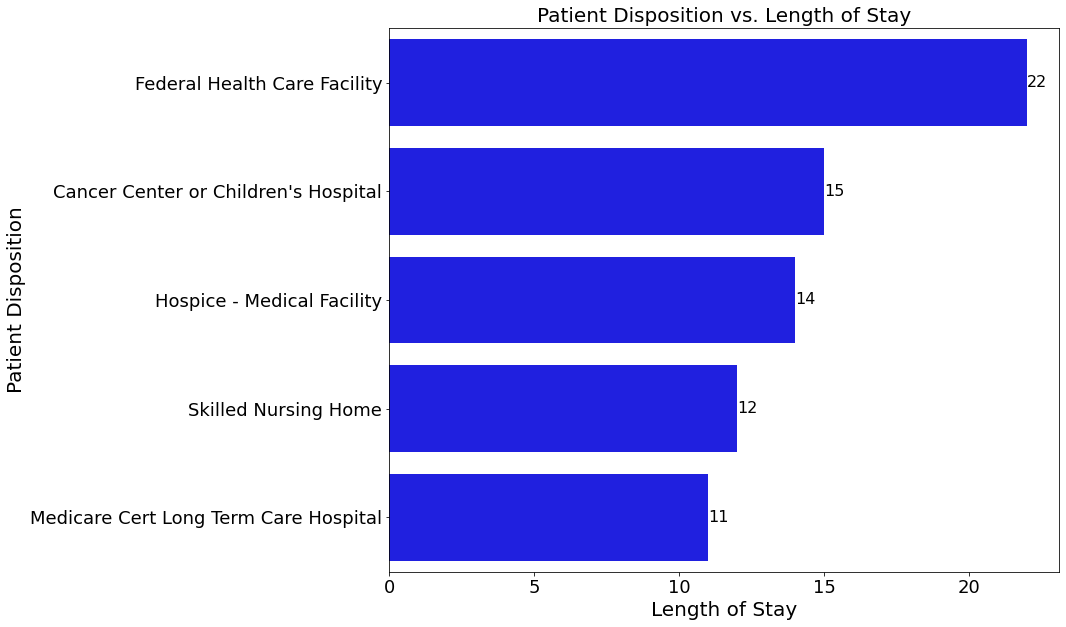

In [174]:
bar_graph(disposition['length_of_stay'],disposition['patient_disposition'], disposition,
          'Patient Disposition vs. Length of Stay', 'Length of Stay','Patient Disposition')

In [169]:
diagnosis = patients.groupby(['ccs_diagnosis_description'])[['length_of_stay']].mean().sort_values(
                                                                    by='length_of_stay', ascending=False).head(5)

In [170]:
diagnosis.reset_index(inplace=True)

In [175]:
diagnosis['length_of_stay'] = diagnosis['length_of_stay'].apply(lambda x: int(x))

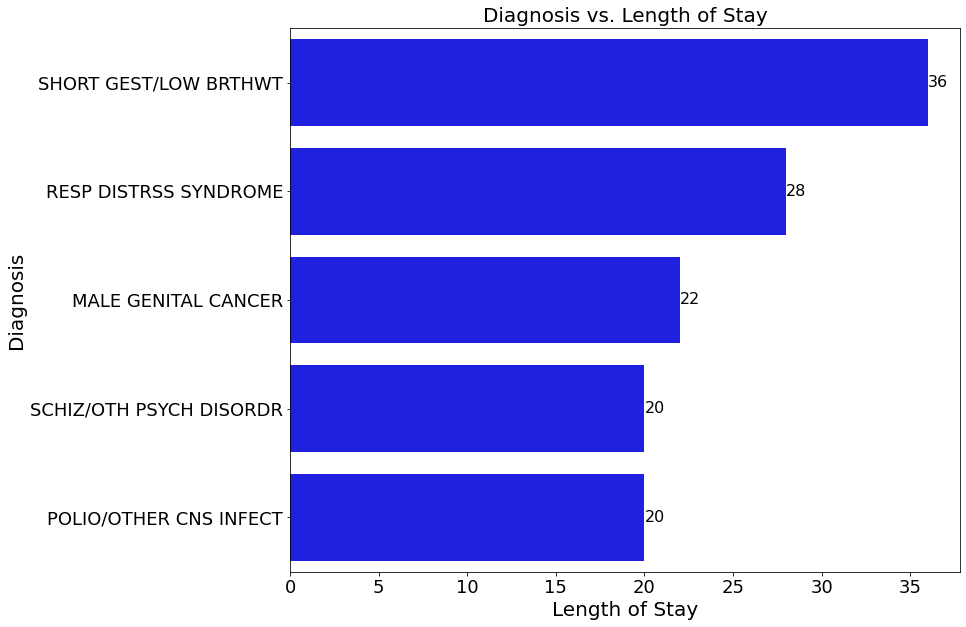

In [176]:
bar_graph(diagnosis['length_of_stay'],diagnosis['ccs_diagnosis_description'], diagnosis,
          'Diagnosis vs. Length of Stay', 'Length of Stay','Diagnosis')

In [177]:
procedure = patients.groupby(['ccs_procedure_description'])[['length_of_stay']].mean().sort_values(
                                                                    by='length_of_stay', ascending=False).head(5)

In [178]:
procedure.reset_index(inplace=True)

In [179]:
procedure['length_of_stay'] = procedure['length_of_stay'].apply(lambda x: int(x))

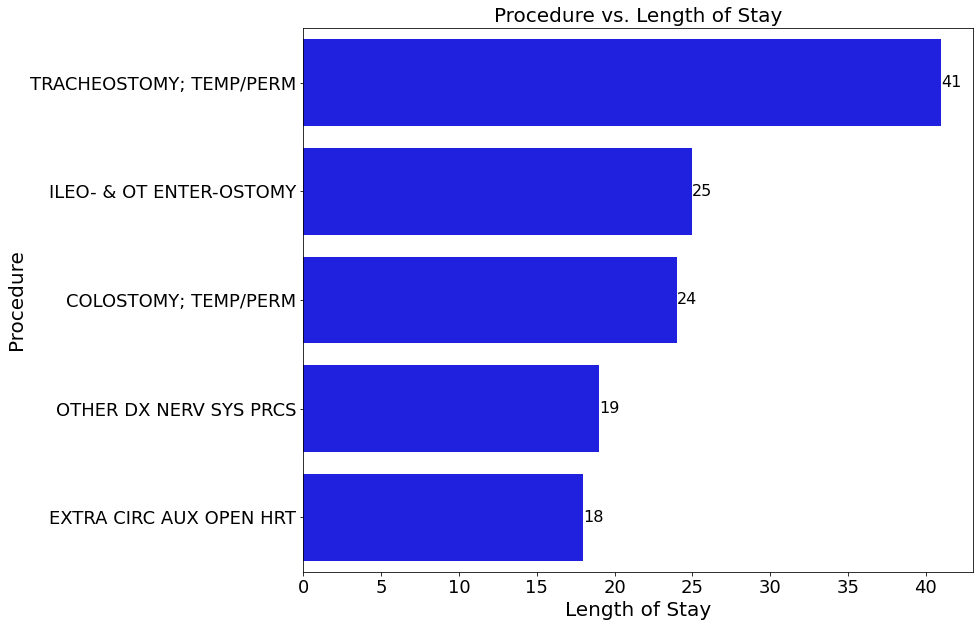

In [181]:
bar_graph(procedure['length_of_stay'],procedure['ccs_procedure_description'], procedure,
          'Procedure vs. Length of Stay', 'Length of Stay','Procedure')

# Model

Text(0, 0.5, 'cumulative explained variance')

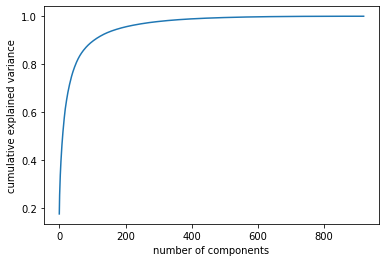

In [182]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np

pca = PCA().fit(df_preproc)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [183]:
X = patients.drop(columns = ['length_of_stay'], axis=1)
y = patients[['length_of_stay']]

In [184]:
X

,health_service_area,facility_name,age_group,gender,race,ethnicity,type_of_admission,patient_disposition,ccs_diagnosis_description,ccs_procedure_description,apr_drg_description,apr_mdc_description,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,source_of_payment_1,emergency_department_indicator,total_charges,total_costs,zip_code
1540091,New York City,Brookdale Hospital Medical Center,0 to 17,M,White,Spanish/Hispanic,Newborn,Home or Self Care,LIVEBORN,NO PROC,"NEONATE BIRTHWT >2499G, NORMAL NEWBORN OR NEON...",Newborns and Other Neonates with Conditions Or...,Minor,Minor,Medical,Insurance Company,N,17611.10,9305.60,100
1540092,New York City,Brookdale Hospital Medical Center,0 to 17,M,Black/African American,Not Span/Hispanic,Emergency,Home or Self Care,SKULL/FACE FRACTURE,"TRTMNT,FACE FRACT/DISLC",DENTAL & ORAL DISEASES & INJURIES,"Ear, Nose, Mouth, Throat and Craniofacial Dise...",Minor,Minor,Medical,CHAMPUS,Y,12429.82,8025.98,100
1540093,New York City,Brookdale Hospital Medical Center,0 to 17,M,Black/African American,Not Span/Hispanic,Newborn,Home or Self Care,LIVEBORN,OTHER THERAPEUTIC PRCS,NEONATE BIRTHWT >2499G W CONGENITAL/PERINATAL ...,Newborns and Other Neonates with Conditions Or...,Moderate,Minor,Medical,Insurance Company,N,20759.16,11015.50,100
1540094,New York City,Brookdale Hospital Medical Center,0 to 17,F,Black/African American,Spanish/Hispanic,Newborn,Home w/ Home Health Services,LIVEBORN,OTHER THERAPEUTIC PRCS,NEONATE BIRTHWT 1500-1999G W CONGENITAL/PERINA...,Newborns and Other Neonates with Conditions Or...,Moderate,Moderate,Medical,Medicaid,N,62600.46,33468.42,100
1540095,New York City,Brookdale Hospital Medical Center,0 to 17,F,Black/African American,Not Span/Hispanic,Emergency,Home or Self Care,MOOD DISORDERS,PSYCHO/PSYCHI EVAL/THER,BIPOLAR DISORDERS,Mental Diseases and Disorders,Moderate,Minor,Medical,Medicaid,Y,24109.50,12666.76,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2478649,New York City,Woodhull Medical & Mental Health Center,70 or Older,M,White,Not Span/Hispanic,Emergency,Home or Self Care,SYNCOPE,DX ULTRASOUND HEART,SYNCOPE & COLLAPSE,Diseases and Disorders of the Circulatory System,Minor,Minor,Medical,Medicare,Y,6118.08,5249.20,OOS
2478650,New York City,Woodhull Medical & Mental Health Center,70 or Older,M,Black/African American,Not Span/Hispanic,Emergency,Home or Self Care,DYSRHYTHMIA,CARDIAC STRESS TESTS,CARDIAC ARRHYTHMIA & CONDUCTION DISORDERS,Diseases and Disorders of the Circulatory System,Major,Moderate,Medical,Medicare,N,9745.40,8361.37,OOS
2478651,New York City,Woodhull Medical & Mental Health Center,70 or Older,M,Other Race,Unknown,Emergency,Skilled Nursing Home,ACUTE RENAL FAILURE,NO PROC,RENAL FAILURE,Diseases and Disorders of the Kidney and Urina...,Major,Major,Medical,Medicare,Y,35808.71,30723.19,OOS
2478652,New York City,Woodhull Medical & Mental Health Center,70 or Older,F,White,Not Span/Hispanic,Emergency,Inpatient Rehabilitation Facility,DYSRHYTHMIA,BLOOD TRANSFUSION,CARDIAC ARRHYTHMIA & CONDUCTION DISORDERS,Diseases and Disorders of the Circulatory System,Extreme,Major,Medical,Medicare,Y,64830.18,55623.06,OOS


In [185]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [186]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [187]:
#Showing that each dataset split possesses similar percentage of y values. 
print("Train percent:", y_train.value_counts(normalize=True)[1])
print("Valid percent: ", y_valid.value_counts(normalize=True)[1])
print("Hold percent: ", y_test.value_counts(normalize=True)[1])

Train percent: length_of_stay
1                 0.145498
dtype: float64
Valid percent:  length_of_stay
1                 0.145512
dtype: float64
Hold percent:  length_of_stay
1                 0.145503
dtype: float64


In [188]:
len(X_train)

190718

In [189]:
len(X_valid)

47680

In [190]:
len(X_test)

59600

In [191]:
#Creating a metrics function that will be reused for all of our modeling. It will contain the two metrics I am most
#focused on: recall and f1. 
def metrics_cv(cross_val_r2, cross_val_rmse, model_type, data):
    
    '''
    The function will take in two cross validation scores. One for recall and one for f1. It will then print out
    the mean score for the train and test sets from the cross validation folds. Additionally, it will take in the 
    model type used (logistic regression), and which dataset it is being performed on (train, valid).
    '''
    
    print(f"{model_type} {data} cross validation scores:")
    print('\n')
    print("r2 scores - ")
    print(f"Average Train Score: {np.mean(cross_val_r2['train_score'])}")
    print(f"Average Test Score: {np.mean(cross_val_r2['test_score'])}")
    print('\n')
    print('rmse scores -')
    print(f"Average Train Score: {np.mean(cross_val_rmse['train_score'])}")
    print(f"Average Test Score: {np.mean(cross_val_rmse['test_score'])}")
    
#*4: Citation
#*5: Citation
#*6: Citation

In [192]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [ ]:
def category(cols, value):
    cols = []

    for col in patients.columns:
        if patients[col].dtype == value:
            cols.append(col)
        
    return cols

In [ ]:
category(cat_cols, 'O')
category(num_cols, 'float64')

In [193]:
cat_cols = []

for col in patients.columns:
    if patients[col].dtype == 'O':
        cat_cols.append(col)
        
cat_cols

['health_service_area',
 'facility_name',
 'age_group',
 'gender',
 'race',
 'ethnicity',
 'type_of_admission',
 'patient_disposition',
 'ccs_diagnosis_description',
 'ccs_procedure_description',
 'apr_drg_description',
 'apr_mdc_description',
 'apr_severity_of_illness_description',
 'apr_risk_of_mortality',
 'apr_medical_surgical_description',
 'source_of_payment_1',
 'emergency_department_indicator',
 'zip_code']

In [194]:
num_cols = []

for col in patients.columns:
    if patients[col].dtype == 'float64':
        num_cols.append(col)
        
num_cols

['total_charges', 'total_costs']

In [195]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scaled', StandardScaler(), num_cols),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_cols)
    ])

In [196]:
linreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('pca', PCA(n_components= 400,random_state=42)),
                              ('model', LinearRegression())
                             ])

In [197]:
linreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaled', StandardScaler(),
                                                  ['total_charges',
                                                   'total_costs']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['health_service_area',
                                                   'facility_name', 'age_group',
                                                   'gender', 'race',
                                                   'ethnicity',
                                                   'type_of_admission',
                                                   'patient_disposition',
                                                   'ccs_diagnosis_description',
              

In [198]:
from sklearn.model_selection import cross_validate
import numpy as np

linreg_r2 = cross_validate(linreg_pipeline, X_train, y_train, scoring="r2", return_train_score=True)
linreg_rmse = cross_validate(linreg_pipeline, X_train, y_train, scoring="neg_root_mean_squared_error", return_train_score=True)

In [199]:
metrics_cv(linreg_r2,linreg_rmse, 'Linear Regression', 'X_train')

Linear Regression X_train cross validation scores:


r2 scores - 
Average Train Score: 0.7309163945100438
Average Test Score: 0.7184584970163405


rmse scores -
Average Train Score: -4.455382165143365
Average Test Score: -4.54009635694471


In [200]:
from sklearn.tree import DecisionTreeRegressor

In [201]:
tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('pca', PCA(n_components= 400,random_state=42)),
                              ('model', DecisionTreeRegressor(random_state=42))
                             ])

In [202]:
tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaled', StandardScaler(),
                                                  ['total_charges',
                                                   'total_costs']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['health_service_area',
                                                   'facility_name', 'age_group',
                                                   'gender', 'race',
                                                   'ethnicity',
                                                   'type_of_admission',
                                                   'patient_disposition',
                                                   'ccs_diagnosis_description',
              

In [203]:
tree_r2 = cross_validate(tree_pipeline, X_train, y_train, scoring="r2", return_train_score=True)
tree_rmse = cross_validate(tree_pipeline, X_train, y_train, scoring="neg_root_mean_squared_error", return_train_score=True)

In [204]:
metrics_cv(tree_r2, tree_rmse, 'Decision Tree Regression', 'X_train')

Decision Tree Regression X_train cross validation scores:


r2 scores - 
Average Train Score: 0.9920114268705575
Average Test Score: 0.7956958458491824


rmse scores -
Average Train Score: -0.7394230482281987
Average Test Score: -3.847692967863592


In [205]:
from sklearn.neighbors import KNeighborsRegressor

In [206]:
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('pca', PCA(n_components= 400, random_state=42)),
                              ('model', KNeighborsRegressor())
                             ])

In [207]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaled', StandardScaler(),
                                                  ['total_charges',
                                                   'total_costs']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['health_service_area',
                                                   'facility_name', 'age_group',
                                                   'gender', 'race',
                                                   'ethnicity',
                                                   'type_of_admission',
                                                   'patient_disposition',
                                                   'ccs_diagnosis_description',
              

In [ ]:
knn_r2 = cross_validate(knn_pipeline, X_train, y_train, scoring="r2", return_train_score=True)
knn_rmse = cross_validate(knn_pipeline, X_train, y_train, scoring="neg_root_mean_squared_error", return_train_score=True)

In [ ]:
metrics_cv(knn_r2, knn_rmse, 'KNearestNeighbor Regression', 'X_train')

# Evaluation

# Conclusion

## Recommendations

## Next Steps